In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML
import os
import re

notebook_path = os.path.abspath("adhoc.ipynb")
notebook_dir = str(os.path.dirname(notebook_path)).replace("\\\\", "/").replace("\\", "/")
output_folder = f"{notebook_dir}/../output"
raw_output = f"{output_folder}/raw"
curated_output = f"{output_folder}/curated"
semantic_output = f"{output_folder}/semantic"

nyse_tickers = f"{notebook_dir}/../wsb/nyse-listed.csv"
nasdaq_tickers = f"{notebook_dir}/../wsb/nasdaq-listed.csv"
curated_stockticker = f"{curated_output}/StockTicker.csv"

In [4]:
pd.set_option('display.max_colwidth', None)
sep = "|"

def convert_list(x):
    return x.strip("[]").split(", ")

df = pd.read_csv(curated_stockticker, sep=sep, 
converters={"title_ticker": lambda x: convert_list(x), 
"submission_text_ticker": lambda x: convert_list(x)}
)

df.dtypes
# display(df)
# display(df.iloc[[0]])

Unnamed: 0                  int64
id                         object
title                      object
name                       object
upvote_ratio              float64
ups                         int64
score                       int64
sort                       object
created                    object
author                     object
num_comments                int64
flair                      object
permalink                  object
built_url                  object
url                        object
submission_text            object
last_updated               object
raw_filename               object
model                      object
title_regex                object
title_ticker               object
submission_text_regex      object
submission_text_ticker     object
dtype: object

In [5]:
df[df['id'].str.contains("l5gsp8")][["title","built_url","title_ticker", "submission_text_ticker"]]


,title,built_url,title_ticker,submission_text_ticker
39,AMD figures today. 100k yolo. Let’s go!🚀🚀🚀,https://www.reddit.com/r/wallstreetbets/comments/l5gsp8/amd_figures_today_100k_yolo_lets_go/,['AMD'],[]


In [6]:

def explode(df, cols):
        """method to explode list columns. mainly used for stock ticker columns

        :param df: pandas df
        :type df: obj
        :param cols: list of cols to explode
        :type cols: list
        """
        for col in cols:
            df = df.explode(col)

        return df

ticker_cols = ["title_ticker", "submission_text_ticker"]

exploded_df = explode(df, ["title_ticker", "submission_text_ticker"])
display(exploded_df)

,Unnamed: 0,id,title,name,upvote_ratio,ups,score,sort,created,author,...,built_url,url,submission_text,last_updated,raw_filename,model,title_regex,title_ticker,submission_text_regex,submission_text_ticker
0,0,l5nizs,"What Are Your Moves Tomorrow, January 27, 2021",t3_l5nizs,0.98,434,434,hot,2021-01-27 00:00:16.000000,AutoModerator,...,https://www.reddit.com/r/wallstreetbets/comments/l5nizs/what_are_your_moves_tomorrow_january_27_2021/,https://www.reddit.com/r/wallstreetbets/comments/l5nizs/what_are_your_moves_tomorrow_january_27_2021/,"Your daily trading discussion thread. Please keep the shitposting to a minimum. \r\n\r\n^Navigate ^WSB|^We ^recommend ^best ^daily ^DD\r\n:--|:-- \r\n**DD** | [All](https://reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3ADD) / [**Best Daily**](https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ADD&restrict_sr=on&t=day) / [Best Weekly](https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ADD&restrict_sr=on&t=week)\r\n**Discussion** | [All](https://reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3ADiscussion) / [**Best Daily**](https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ADiscussion&restrict_sr=on&t=day) / [Best Weekly](https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ADiscussion&restrict_sr=on&t=week)\r\n**YOLO** | [All](https://reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3AYOLO) / [**Best Daily**](https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3AYOLO&restrict_sr=on&t=day) / [Best Weekly](https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3AYOLO&restrict_sr=on&t=week)\r\n**Gain** | [All](https://reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3AGain) / [**Best Daily**](https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3AGain&restrict_sr=on&t=day) / [Best Weekly](https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3AGain&restrict_sr=on&t=week)\r\n**Loss** | [All](https://reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3ALoss) / [**Best Daily**](https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ALoss&restrict_sr=on&t=day) / [Best Weekly](https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ALoss&restrict_sr=on&t=week)\r\n\r\n[Weekly Earnings Discussion Thread](https://www.reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3A%22Earnings%20Thread%22)\r\n\r\n**Read the [rules](https://www.reddit.com/r/wallstreetbets/wiki/contentguide) and make sure other people follow them.**\r\n\r\nTry [No Meme Mode](https://www.reddit.com/r/wallstreetbets/search/?q=-flair%3AMeme%20-flair%3ASatire%20-flair%3AShitpost&restrict_sr=1&t=day&sort=hot), also accessible through the top bar.\r\n\r\n---\r\n\r\n[**Check out WSB.GOLD stats generated live from WSB activity**](https://wsb.gold/public/dashboard/e65fcfcb-70a4-4d86-b7fb-888057c67881)",2021-01-26 16:27:08.822090,../output/raw/2021/01/26/StockTicker_162708.csv,StockTicker,[],,"['DD', 'WSB', 'GOLD', 'WSB']",'DD'
0,0,l5nizs,"What Are Your Moves Tomorrow, January 27, 2021",t3_l5nizs,0.98,434,434,hot,2021-01-27 00:00:16.000000,AutoModerator,...,https://www.reddit.com/r/wallstreetbets/comments/l5nizs/what_are_your_moves_tomorrow_january_27_2021/,https://www.reddit.com/r/wallstreetbets/comments/l5nizs/what_are_your_moves_tomorrow_january_27_2021/,"Your daily trading discussion thread. Please keep the shitposting to a minimum. \r\n\r\n^Navigate ^WSB|^We ^recommend ^best ^daily ^DD\r\n:--|:-- \r\n**DD** | [All](https://reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3ADD) / [**Best Daily**](https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ADD&restrict_sr=on&t=day) / [Best Weekly](https://www.reddit.com/r/wallstreetbets/search?sort=top&q=flair%3ADD&restrict_sr=on&t=week)\r\n**Discussion** | [All](https://reddit.com/r/wallstreetbets/search?sort=new&restrict_sr=on&q=flair%3ADiscussion) 

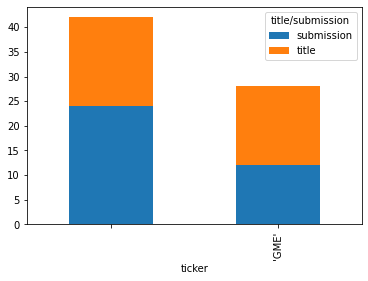

In [8]:
# https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart

# pd.pivot_table(exploded_df, values='id', index=ticker_cols, columns=['C'], aggfunc=np.sum)

title_df = exploded_df[["id", "title", "built_url", "title_ticker"]].drop_duplicates(subset=['id', 'title_ticker'])
title_df["title/submission"] = "title"
title_df = title_df.rename({"title_ticker": "ticker"},axis=1)

# title_df.groupby("title_ticker").nunique()
# agg_title = title_df[["id", "ticker", "title/submission"]].groupby(["ticker", "title/submission"]).agg(['count']).reset_index()

submission_df = exploded_df[["id", "title", "built_url", "submission_text_ticker"]].drop_duplicates(subset=['id','submission_text_ticker'])
submission_df["title/submission"] = "submission"
submission_df = submission_df.rename({"submission_text_ticker": "ticker"}, axis=1)

# agg_submission = submission_df[["id", "ticker", "title/submission"]].groupby(["ticker", "title/submission"]).agg(['count']).reset_index()


# agg_title.merge(agg_submission, on="ticker", how="outer")
# pd.concat([agg_submission,agg_title], ignore_index=True)
plot_df = pd.concat([title_df, submission_df], ignore_index=True)


# concat_df = concat_df[["ticker", "title/submission"]]

def filter_count(df, col, min):
    return df[df.groupby(col)[col].transform('count') > min]

plot_df = filter_count(plot_df, "ticker", 11)
plot_df.groupby(["ticker", "title/submission"])["ticker"].count().unstack('title/submission').fillna(0).plot(kind='bar', stacked=True).figure.savefig(f'{notebook_dir}/StockTicker.png')